## 한글문서 내 단어 빈도수 분석 및 워드클라우드로 시각
1. 한글 문서에서 명사만 추출 : koNLPy 라이브러리 활용
1. 명사에 대한 빈도수 분석 : collections.Counter 활용 (built-in)
1. 상위 빈도수 명사에 대해서 워드클라우드 생성 : WordCloud 라이브러리 활용

### koNLPy 라이브러리 설치
1. 설치 기본 사항 확인 : 윈도우 비트 수, 파이썬 버전, JDK (1.7 이상)
2. 환경변수의 시스템 변수 설정 : JAVA_HOME = JDK 설치된 경로

In [1]:
!python -m pip install --upgrade konlpy


### WordCloud 라이브러리 설치

In [4]:
!pip install wordcloud

                                              0.0/152.1 kB ? eta -:--:--
     ---------                             41.0/152.1 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 152.1/152.1 kB 1.8 MB/s eta 0:00:00


# 1. 데이터 준비
1. 데이터 로딩 (파이썬 객체로)
1. 분석할 데이터 추출 및 정제
1. 명사 데이터만 추출

### 1-1. 파일 읽기 (json 파일을 파이썬 객체로 로딩하기) : json.load

In [9]:
import json

filename = "아시안게임_news.json"

with open(filename, "r", encoding="utf8") as infile:
    data = json.load(infile)
data

[{'index': 1,
  'title': "'구해줘 홈즈', 오늘(5일) AG 편성으로 결방",
  'description': "'구해줘 홈즈'가 오늘(5일) 항저우 <b>아시안게임</b>(AG) 중계 여파로 쉬어간다. MBC '구해줘! 홈즈' 측은 &quot;제19회 항저우 <b>아시안게임</b> 편성으로 결방 예정이다&quot;고 알리며 &quot;시청에 작오 없으시기 바라며 시청자 여러분들의 많은... ",
  'link': 'http://www.stoo.com/article.php?aid=89418430626',
  'orgLink': 'http://www.stoo.com/article.php?aid=89418430626',
  'pubDate': '2023-10-05 09:56:00'},
 {'index': 2,
  'title': '스포츠클라이밍 스피드 릴레이 남녀 대표팀, 동메달 획득 [항저우 AG]',
  'description': '2022 항저우 <b>아시안게임</b> 스포츠클라이밍 스피드 계주에서 남녀 대표팀이 동반 동메달을 목에 걸었다. 남녀 대표팀은 4일 오후 9시 중국 항저우에서 열린 대회 스포츠클라이밍 스피드릴레이 결승 경기에서 모두... ',
  'link': 'https://n.news.naver.com/mnews/article/119/0002755037?sid=104',
  'orgLink': 'https://www.dailian.co.kr/news/view/1279608/?sc=Naver',
  'pubDate': '2023-10-05 09:56:00'},
 {'index': 3,
  'title': "'4연패' 도전 韓 야구, 일본 넘어야 금메달 보인다",
  'description': '<b>아시안게임</b> 4연패에 도전하는 대한민국 야구 대표팀이 슈퍼라운드를 치른다. 류중일 감독이 이끄는 한국은 5일 중국 저장성 항저우 샤오산 야구-소프트볼센터 보조야구장에서 2022 항저우 <b>아시안게임</b> 슈퍼라운드... '

### 1-2. 분석할 데이터 추출 및 정제
* re : regular expression
  - re.sub(matching_pattern, replace_string, target_string)
  
 https://wikidocs.net/4308

In [13]:
#json 데이터 중 본문에 해당하는 부분을 가져와서 정제한 후 통합하기
import re

total_result = ''
for item in data:
    clean_data = re.sub(r'[\W]', ' ', item['description'])
    total_result += clean_data
total_result

' 구해줘 홈즈 가 오늘 5일  항저우  b 아시안게임  b  AG  중계 여파로 쉬어간다  MBC  구해줘  홈즈  측은  quot 제19회 항저우  b 아시안게임  b  편성으로 결방 예정이다 quot 고 알리며  quot 시청에 작오 없으시기 바라며 시청자 여러분들의 많은    2022 항저우  b 아시안게임  b  스포츠클라이밍 스피드 계주에서 남녀 대표팀이 동반 동메달을 목에 걸었다  남녀 대표팀은 4일 오후 9시 중국 항저우에서 열린 대회 스포츠클라이밍 스피드릴레이 결승 경기에서 모두     b 아시안게임  b  4연패에 도전하는 대한민국 야구 대표팀이 슈퍼라운드를 치른다  류중일 감독이 이끄는 한국은 5일 중국 저장성 항저우 샤오산 야구 소프트볼센터 보조야구장에서 2022 항저우  b 아시안게임  b  슈퍼라운드    윤 원내대표는 포털 다음의 항저우  b 아시안게임  b  축구 응원 페이지에서 여론 조작 의혹 관련해선  quot 더 심각한 문제는 이런 식으로 손쉽게 응원조작이 이뤄진다면 얼마든지 선거조작의 길도 열릴 수 있다는 데 있다 quot 며  quot 국내    충남  보령시청 직장운동경기부 요트팀 소속 이태훈 선수가 지난 9월 17일부터 26일까지 출전한 항저우  b 아시안게임  b  요트 윈드서핑 iQFoil급  종목에서 보령시청 요트팀 최초로 은메달을 획득했다  보령시청 요트팀 이태훈    2022 항저우  b 아시안게임  b 과 함께하는  조선체육회 가 10월 9일 특별 편성 방송으로   b 아시안게임  b  메달리스트 특집 을 선보인다  금빛 찬란한 피  땀  눈물로 따낸 항저우  b 아시안게임  b  메달을 목에 건 이들로는  탁구      다음 지난 1일 열린  b 아시안게임  b  남자축구 8강전 관련  다음 스포츠 의 클릭 응원에서 나타난 중국 역응원 현상이 발단이었다  한국이 중국을 2대 0으로 이긴 직후인 이날 오후 10시 40분쯤 한국 응원 수는 약 160만 건으로    스포츠클라이밍은 2018년 자카르타 팔렘방  b

### 1-3. 품사 태깅 : 명사 추출
* koNLPy 내 Okt 라이브러리 활용

https://konlpy.org/en/latest/

In [14]:
from konlpy.tag import Okt

okt = Okt()

total_result_noun = okt.nouns(total_result)

total_result_noun

['구',
 '홈즈',
 '오늘',
 '항저우',
 '아시안',
 '게임',
 '중계',
 '여파',
 '간다',
 '구',
 '홈즈',
 '측은',
 '제',
 '항저우',
 '아시안',
 '게임',
 '편성',
 '결방',
 '예정',
 '고',
 '알리',
 '시청',
 '시청자',
 '여러분',
 '항저우',
 '아시안',
 '게임',
 '스포츠',
 '밍',
 '스피드',
 '계주',
 '남녀',
 '대표팀',
 '동반',
 '동메달',
 '목',
 '남녀',
 '대표팀',
 '오후',
 '중국',
 '항저우',
 '대회',
 '스포츠',
 '밍',
 '스피드',
 '릴레이',
 '결승',
 '경기',
 '모두',
 '아시안',
 '게임',
 '연패',
 '도전',
 '대한민국',
 '야구',
 '대표팀',
 '슈퍼',
 '라운드',
 '류중일',
 '감독',
 '한국',
 '중국',
 '저장성',
 '항저우',
 '샤',
 '오산',
 '야구',
 '소프트볼',
 '센터',
 '보조',
 '야구장',
 '항저우',
 '아시안',
 '게임',
 '슈퍼',
 '라운드',
 '윤',
 '원내대표',
 '포털',
 '다음',
 '항저우',
 '아시안',
 '게임',
 '축구',
 '응원',
 '페이지',
 '여론',
 '조작',
 '의혹',
 '관련',
 '선',
 '더',
 '문제',
 '식',
 '응원',
 '조작',
 '얼마',
 '선거',
 '조작',
 '수',
 '데',
 '며',
 '국내',
 '충남',
 '보령',
 '시청',
 '직장',
 '운동경기',
 '부',
 '요트',
 '팀',
 '소속',
 '이태훈',
 '선수',
 '지난',
 '출전',
 '항저우',
 '아시안',
 '게임',
 '요트',
 '윈드서핑',
 '급',
 '종목',
 '보령',
 '시청',
 '요트',
 '팀',
 '최초',
 '은메달',
 '획득',
 '보령',
 '시청',
 '요트',
 '팀',
 '이태훈',
 '항저우',
 '아시안',
 '게임',
 '과',
 

## 2. 데이터 탐색 및 분석

### 2-1. 단어 빈도 탐색 : collections.Counter
* from collections import Counter
   - *counterObject* = **Counter**(*pyObject*)
       - 데이터 집합에서 개수를 자동으로 계산
   - *counterObject*.most_common(*number*)
       - 빈도수가 높은 상위 number개의 데이터만 추출

https://docs.python.org/3/library/collections.html#collections.Counter

In [16]:
from collections import Counter
count = Counter(total_result_noun)
count

Counter({'구': 4,
         '홈즈': 2,
         '오늘': 20,
         '항저우': 1505,
         '아시안': 1176,
         '게임': 1181,
         '중계': 7,
         '여파': 2,
         '간다': 1,
         '측은': 1,
         '제': 92,
         '편성': 5,
         '결방': 1,
         '예정': 5,
         '고': 6,
         '알리': 1,
         '시청': 18,
         '시청자': 2,
         '여러분': 17,
         '스포츠': 553,
         '밍': 30,
         '스피드': 23,
         '계주': 22,
         '남녀': 23,
         '대표팀': 297,
         '동반': 7,
         '동메달': 54,
         '목': 40,
         '오후': 236,
         '중국': 764,
         '대회': 131,
         '릴레이': 8,
         '결승': 191,
         '경기': 243,
         '모두': 17,
         '연패': 49,
         '도전': 42,
         '대한민국': 274,
         '야구': 55,
         '슈퍼': 23,
         '라운드': 40,
         '류중일': 6,
         '감독': 214,
         '한국': 589,
         '저장성': 52,
         '샤': 2,
         '오산': 2,
         '소프트볼': 8,
         '센터': 513,
         '보조': 1,
         '야구장': 1,
         '윤': 4,
      

## 2-2. 데이터 분석에 활용할 데이터 추출

In [19]:
# 출현 횟수가 많은 상위 80개의 단어 중에서 단어길이가 1보다 큰 것만 추출
number = 80
word_count = {}
for word, counts in count.most_common(number):
    if len(word) > 1:
        word_count[word] = counts
word_count

{'항저우': 1505,
 '게임': 1181,
 '아시안': 1176,
 '중국': 764,
 '남자': 617,
 '한국': 589,
 '스포츠': 553,
 '센터': 513,
 '축구': 506,
 '우즈베키스탄': 342,
 '스타디움': 317,
 '황룽': 308,
 '대표팀': 297,
 '대한민국': 274,
 '경기': 243,
 '오후': 236,
 '감독': 214,
 '황선홍': 214,
 '강전': 210,
 '선수': 202,
 '결승': 191,
 '올림픽': 181,
 '높이뛰기': 172,
 '금메달': 157,
 '우상혁': 154,
 '뉴스': 148,
 '승리': 145,
 '은메달': 136,
 '대회': 131,
 '정우영': 125,
 '여자': 110,
 '이하': 108,
 '진출': 104,
 '시간': 103,
 '결선': 103,
 '육상': 102,
 '일본': 102,
 '응원': 94,
 '기자': 93,
 '메달': 91,
 '준결승': 82,
 '양궁': 82,
 '차지': 78,
 '지난': 77,
 '연속': 64,
 '상대': 64,
 '사진': 63,
 '결승전': 63,
 '멀티골': 63,
 '카타르': 62,
 '경기장': 57,
 '야구': 55,
 '동메달': 54,
 '우승': 53,
 '저장성': 52,
 '다음': 52,
 '국가대표팀': 50,
 '연패': 49,
 '대결': 49,
 '출전': 48,
 '북한': 48,
 '종목': 45,
 '한일전': 45}

# 3. 시각화
## 3-1. 워드클라우드 : WordCloud
1. wordcloud 객체 생성 : *wordcloudObject* = **WordCloud**(*font_path*, *optional_parameters*)
1. 빈도기반으로 wordcloud 이미지 생성 : *wordcloudObject* = *wordcloudObject*.**generate_from_frequencies**(*frequencies[, …]*)
1. matplotlib.pyplot으로 시각화
    1. (생략가능) 특정 option으로 figure 생성 : *plt*.**figure**(*optional parameters*)
    1. 빈도수 기반의 wordcloud 객체를 입력으로 image 생성 : *plt*.**imshow**(*array-like data*)
    1. 축이 보이지 않도록 off : *plt*.**axis**('off')
    1. plt.show()
1. 생성한 wordcloud 이미지를 파일로 저장 : *wordcloudObject*.**to_file**(*filename*)


https://amueller.github.io/word_cloud/index.html

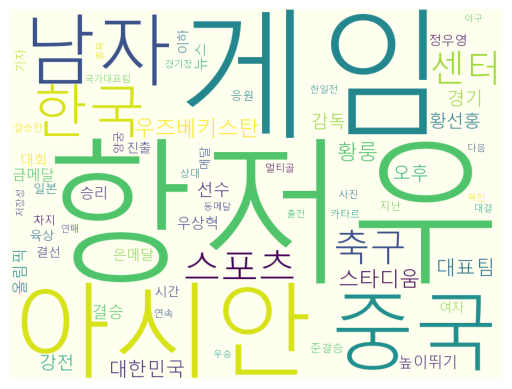

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = 'C:\\Windows\\Fonts\\malgunsl.ttf'
wordcloud = WordCloud(font_path, background_color="ivory", width=800, height=600)
wordcloud_freq = wordcloud.generate_from_frequencies(word_count)

plt.imshow(wordcloud_freq)
plt.axis('off')
plt.show()

# 검색어 입력 -> NaverNews crawling(.json으로 저장) -> wordcloud출력

검색어를 입력하세요 :배재민
배재민 [1] : Succes
배재민 [101] : Succes
배재민 [201] : Succes
배재민 [301] : Succes
배재민 [401] : Succes
배재민 [501] : Succes
배재민 [601] : Succes
배재민 [701] : Succes
배재민 [801] : Succes
배재민 [901] : Succes
배재민 [1001] : End
배재민_news.json Saved


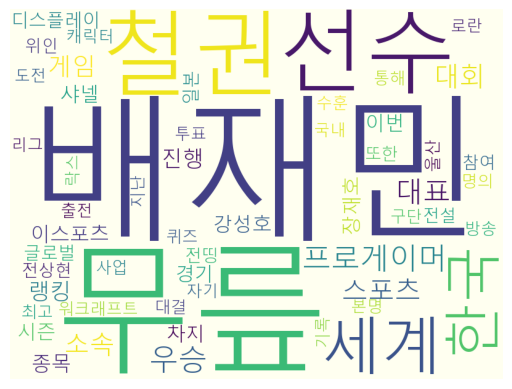

In [45]:
import os
import sys
import urllib.request
import json
import datetime
import re
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 상수 데이터 설정
client_id = "SZo1AOzpBkJB01B9TFPW"
client_secret = "JZRpqTh_jn"
const_url = "https://openapi.naver.com/v1/search/news?query=" # JSON 결과
const_start = 1
const_display = 100

#######################################################
#네이버 뉴스를 검색하여, json형태로 검색 결과 return
def searchNaverNews(keyword, start, display):

# query string 생성
    encText = urllib.parse.quote(keyword)
    reqUrl = const_url+f"{encText}&start={start}&display={display}"
    
# Request 객체 생성
    request = urllib.request.Request(reqUrl)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    
# Request 객체의 urlopen을 실행하여 Response 받기
    result_json = None
    try:
        response = urllib.request.urlopen(request)
        rescode = response.getcode()
# Response 객체에서 검색 결과 얻어서 json으로 변환하기
        if(rescode==200):
            response_body = response.read()
            response_body_dec = response_body.decode('utf-8')
            result_json = json.loads(response_body_dec)
    except Exception as e:
        None
#         print(e)
#         print(f"Error :{reqUrl}")

# 검색이 진행되는 상황 logging 하기
    if (result_json != None):
        print(f"{keyword} [{start}] : Succes")
    else:
        print(f"{keyword} [{start}] : End")
        
# JSON 형태의 검색 결과 return하기
    return result_json

#############################################################
# 파이썬 객체에서 검색 결과를 정리해서 리스트에 추가하기
def setNewSearchResult(result_all_list, current_result):
    cur_index = 1
    if result_all_list != []:
        cur_index = result_all_list[-1]['index'] + 1
    for result in current_result['items']:
        index = cur_index
        title = result['title']
        link = result['link']
        orgLink = result['originallink']
        # 날짜 스트링을 format에 맞게 읽어서 datetime 객체로 변환
        pubDate = datetime.datetime.strptime(result['pubDate'],
                                             '%a, %d %b %Y %H:%M:%S +0900')
        # datetime 객체를 원하는 format의 date string으로 변환
        pubDate = pubDate.strftime('%Y-%m-%d %H:%M:%S')
        description = result['description']
        new_result = {'index':index, 'title':title, 'description':description,
                      'link':link, 'orgLink':orgLink, 'pubDate':pubDate}
        result_all_list.append(new_result)
        cur_index += 1

#############################################################
# 리스트에 저장된 검색 결과를 json 파일로 저장하기
def saveSearchResult(filename, list_result_all):
    with open(filename, "w", encoding="utf8") as outfile:
        json_string = json.dumps(list_result_all, ensure_ascii=False, indent=4)
        outfile.write(json_string)
    print(f"{filename} Saved")
    
#############################################################
#분석할 데이터 추출 및 정제
def wordcloud_news(keyword):
    total_result = ''
    for item in keyword:
        clean_data = re.sub(r'[\W]', ' ', item['description'])
        total_result += clean_data

    #############################################################
    #품사 태깅 : 명사 추출
    okt = Okt()

    total_result_noun = okt.nouns(total_result)


    #############################################################
    #데이터 탐색 및 분석
    count = Counter(total_result_noun)

    #############################################################
    # 출현 횟수가 많은 상위 80개의 단어 중에서 단어길이가 1보다 큰 것만 추출
    number = 80
    word_count = {}
    for word, counts in count.most_common(number):
        if len(word) > 1:
            word_count[word] = counts

    #############################################################
    #시각화
    font_path = 'C:\\Windows\\Fonts\\malgunsl.ttf'
    wordcloud = WordCloud(font_path, background_color="ivory", width=800, height=600)
    wordcloud_freq = wordcloud.generate_from_frequencies(word_count)

    plt.imshow(wordcloud_freq)
    plt.axis('off')
    plt.show()

############################ Main 시작 ######################
# 필요 변수 초기화
result_all_list = [] #검색 결과 저장 변수
start = const_start
display = const_display

#검색어는 입력받기 : keyword
keyword = input("검색어를 입력하세요 :")

#네이버 뉴스를 검색하여 리스트로 저장
result_json = searchNaverNews(keyword, start, display) # 최초의 검색 실행
#응답데이터가 없을 때까지 반복
while result_json != None:
    # 응답데이터를 리스트에 저장 
    setNewSearchResult(result_all_list, result_json)
    # start 값 증가 (검색 결과 수만큼)
    start += result_json['display'] 
    # 네이버 뉴스 검색
    result_json = searchNaverNews(keyword, start, display)

#모든 검색 결과 담겨 리스트를 JSON 파일로 저장
saveSearchResult(f"{keyword}_news.json", result_all_list)
#wordcloud 실행
wordcloud_news(result_all_list)